In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()


Q1

In [184]:
hdf = pd.read_csv("SDS_Hackathon_Dataset_30_11_22.csv")
hdf.head()

,Unnamed: 0,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
0,0,97.0,78.0,0.0,1.0,1.0,63.0,119.0
1,1,82.0,68.0,1.0,0.0,3.0,70.0,225.0
2,2,88.0,62.0,0.0,0.0,3.0,72.0,175.0
3,3,106.0,74.0,0.0,0.0,3.0,72.0,170.0
4,4,78.0,63.0,0.0,1.0,3.0,67.0,125.0


In [185]:
count = hdf.count()
count

Unnamed: 0    232
Active        230
Rest          229
Smoke         228
Gender        226
Exercise      231
Hgt           223
Wgt           217
dtype: int64

Number of students surveyed = 232
Entire dataset is numerical with the exception of Smoke and Gender which are nominal

Q2

In [186]:
active_median = hdf["Active"].median()
rest_median = hdf["Rest"].median()
smoke_mode = hdf["Smoke"].mode()                # mode = 0 i.e. non smokers
gender_mode = hdf["Gender"].mode()              # mode = 0 i.e. men
excercise_mean = hdf["Exercise"].mean()
height_mean = hdf["Hgt"].mean()
weight_mean = hdf["Wgt"].mean()

print("Average of active heartrate = ", active_median)
print("Average of rest heartrate = ", rest_median)  
print("Majority of the population does not smoke")
print("Majority of the population is male")
print("Average of excercise per hour = ", excercise_mean)
print("Average of height = ", height_mean)
print("Average of weight = ", weight_mean)


Average of active heartrate =  88.5
Average of rest heartrate =  68.0
Majority of the population does not smoke
Majority of the population is male
Average of excercise per hour =  2.25974025974026
Average of height =  68.32735426008969
Average of weight =  158.13824884792626


In [187]:
active_std = hdf["Active"].std()
rest_std = hdf["Rest"].std()
height_std = hdf["Hgt"].std()
weight_std = hdf["Wgt"].std()
exercise_std = hdf["Exercise"].std()

print("Standard deviation of active heart rate ", active_std)
print("Standard deviation of rest heart rate ", rest_std)
print("Standard deviation of exercise per hour ", exercise_std)
print("Standard deviation of height ", height_std)
print("Standard deviation of weight", weight_std)

Standard deviation of active heart rate  18.88062485892889
Standard deviation of rest heart rate  10.007154798904288
Standard deviation of exercise per hour  0.7354844142101308
Standard deviation of height  3.7362981746121586
Standard deviation of weight 31.38130580977593


In [188]:
active_range = hdf["Active"].max() - hdf["Active"].min()
rest_range =  hdf["Rest"].max() - hdf["Rest"].min()
excercise_range =  hdf["Exercise"].max() - hdf["Exercise"].min()
height_range =  hdf["Hgt"].max() - hdf["Hgt"].min()
weight_range =  hdf["Wgt"].max() - hdf["Wgt"].min()

print("Range of active heart rate = ", active_range)
print("Range of rest heart rate = ", rest_range)
print("Range of exercise per week = ", excercise_range)
print("Range of height = ", height_range)
print("Range of weight = ", weight_range)



Range of active heart rate =  103.0
Range of rest heart rate =  63.0
Range of exercise per week =  2.0
Range of height =  18.0
Range of weight =  158.0


Q3

In [189]:
missing_val = pd.isna(hdf).sum()
missing_val

Unnamed: 0     0
Active         2
Rest           3
Smoke          4
Gender         6
Exercise       1
Hgt            9
Wgt           15
dtype: int64

In [190]:
hdf["Active"].fillna(active_median, inplace = True)
hdf["Rest"].fillna(rest_median, inplace = True)
hdf["Smoke"].fillna(0.0, inplace = True)
hdf["Gender"].fillna(0.0, inplace = True)
hdf["Exercise"].fillna(excercise_mean, inplace = True)
hdf["Hgt"].fillna(height_mean, inplace = True)
hdf["Wgt"].fillna(weight_mean, inplace = True)

In [191]:
missing_val = pd.isna(hdf).sum()
missing_val

Unnamed: 0    0
Active        0
Rest          0
Smoke         0
Gender        0
Exercise      0
Hgt           0
Wgt           0
dtype: int64

Q4

In [192]:
gender_classes = len(hdf["Gender"].unique())
print("Number of classes in gender = ", gender_classes)
smoke_classes = len(hdf["Smoke"].unique())
print("Number of classes in smoke = ", smoke_classes)

Number of classes in gender =  2
Number of classes in smoke =  2


In [193]:
hdf["Smoke"].replace(0.0, "Non-Smoker", inplace = True)
hdf["Smoke"].replace(1.0, "Smoker", inplace = True)
hdf

,Unnamed: 0,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
0,0,97.0,78.0,Non-Smoker,1.0,1.0,63.0,119.0
1,1,82.0,68.0,Smoker,0.0,3.0,70.0,225.0
2,2,88.0,62.0,Non-Smoker,0.0,3.0,72.0,175.0
3,3,106.0,74.0,Non-Smoker,0.0,3.0,72.0,170.0
4,4,78.0,63.0,Non-Smoker,1.0,3.0,67.0,125.0
...,...,...,...,...,...,...,...,...
227,227,105.0,85.0,Non-Smoker,1.0,2.0,64.0,150.0
228,228,82.0,74.0,Non-Smoker,1.0,3.0,66.0,124.0
229,229,102.0,81.0,Non-Smoker,0.0,2.0,69.0,172.0
230,230,87.0,67.0,Non-Smoker,0.0,2.0,68.0,170.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

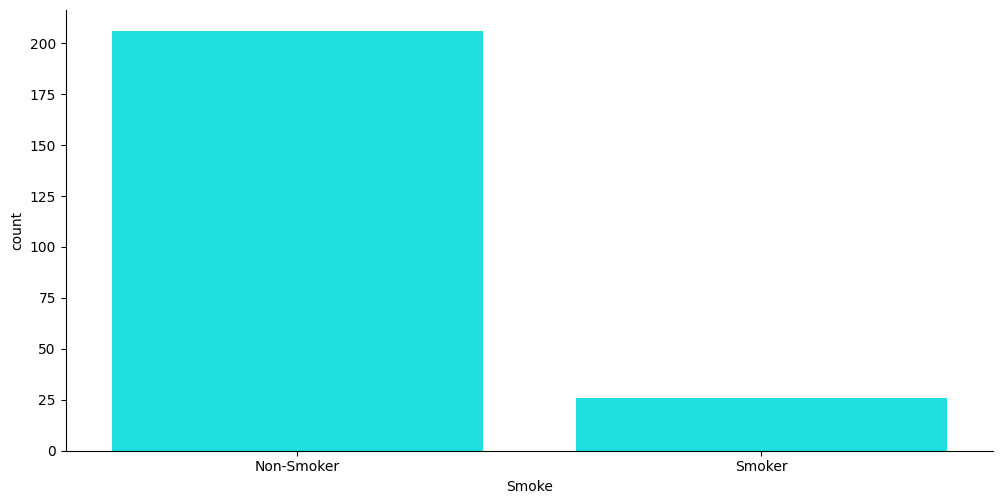

In [194]:

smokers_bar = sns.catplot( x = hdf["Smoke"], data = hdf, aspect = 2, kind = "count", color = "aqua")

Majority of the population does not smoke.

In [ ]:
hdf["Gender"].replace(0.0, "Male", inplace = True)
hdf["Gender"].replace(1.0, "Female", inplace= True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

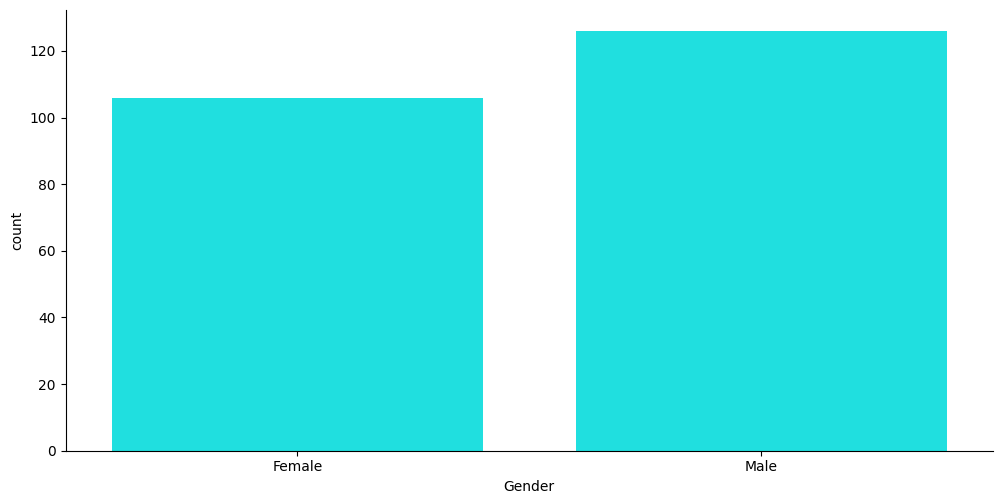

In [ ]:
genders_bar = sns.catplot( x = hdf["Gender"], data = hdf, aspect = 2, kind = "count", color = "aqua")

Almost equal number of men and women were surveyed.

Q5

<AxesSubplot: xlabel='Active', ylabel='Count'>

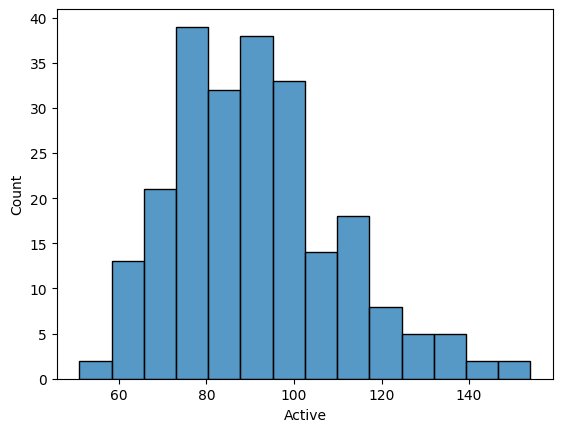

In [ ]:
sns.histplot(data = hdf, x = "Active")

Active heart rates is right skewed and bimodal with few outliers.

<AxesSubplot: xlabel='Rest', ylabel='Count'>

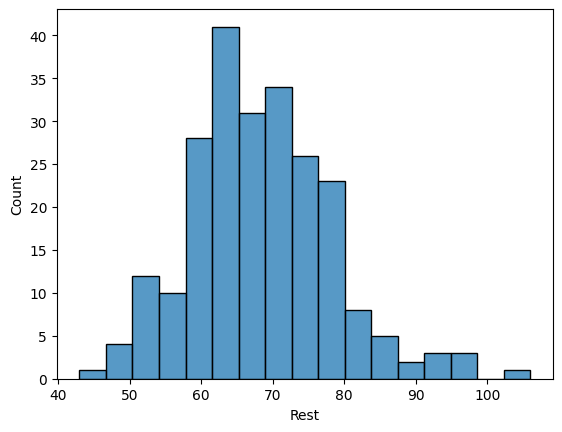

In [ ]:
sns.histplot(data = hdf, x = "Rest")

Rest heart rates are unimodal and right skewed with few outliers.

Q6

<AxesSubplot: xlabel='Active'>

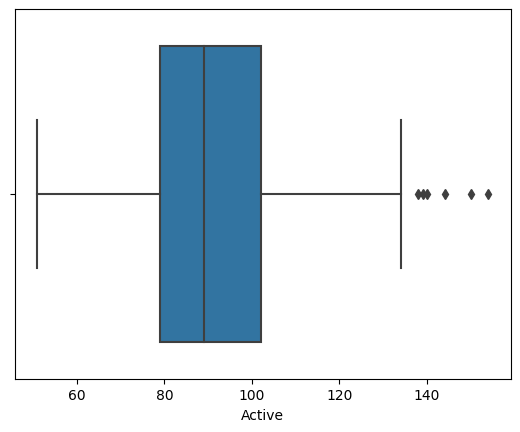

In [ ]:
sns.boxplot(data = hdf, x = "Active")

<AxesSubplot: xlabel='Rest'>

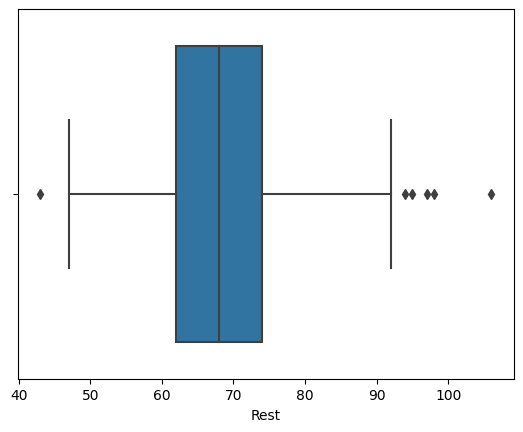

In [ ]:
sns.boxplot(data = hdf, x = "Rest")

Inter quartile range

In [ ]:
active_Q3 = np.quantile(hdf["Active"], 0.75)
active_Q1 = np.quantile(hdf["Active"], 0.25)

active_IQR = active_Q3 - active_Q1
active_IQR

23.0

In [ ]:
rest_Q3 = np.quantile(hdf["Rest"], 0.75)
rest_Q1 = np.quantile(hdf["Rest"], 0.25)

rest_IQR = rest_Q3 - rest_Q1
rest_IQR

12.0

Active heart rate inter quartile range is almost twice that of rest heart rate.

In [ ]:
hdf1 = hdf.groupby("Gender").mean()


C:\Users\ragha\AppData\Local\Temp\ipykernel_28840\1964648173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hdf1 = hdf.groupby("Gender").mean()


In [ ]:
hdf1

,Unnamed: 0,Active,Rest,Exercise,Hgt,Wgt
Gender,,,,,,
Female,112.981132,95.172765,70.141509,2.150943,65.458837,136.669507
Male,117.619048,88.065977,66.857732,2.351268,70.740551,176.199254


In [ ]:
active_df = pd.DataFrame(
    {
        "Gender" : ["Female", "Male"],
        "Active" : [95.172765, 	88.065977],
        "Rest" :   [70.141509, 66.857732],
        "Exercise" : [2.150943,	2.351268]
    }
)
active_df

,Gender,Active,Rest,Exercise
0,Female,95.172765,70.141509,2.150943
1,Male,88.065977,66.857732,2.351268


<AxesSubplot: xlabel='Gender', ylabel='Rest'>

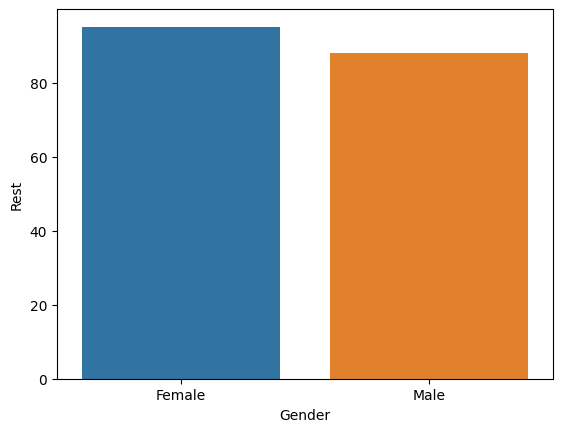

In [ ]:
sns.barplot(x = active_df["Gender"], y = active_df["Active"])


<AxesSubplot: xlabel='Gender', ylabel='Rest'>

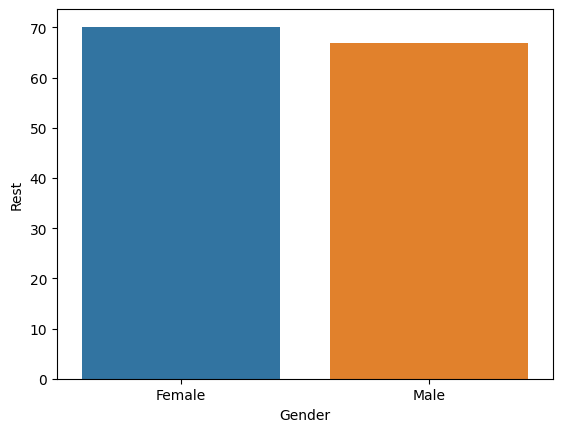

In [ ]:
sns.barplot(x = active_df["Gender"], y = active_df["Rest"])

 Females tend to have higher active adn rest heart rates than males.

In [ ]:
hdf2 = hdf.groupby("Smoke").mean()
hdf2

C:\Users\ragha\AppData\Local\Temp\ipykernel_28840\2153495909.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hdf2 = hdf.groupby("Smoke").mean()


,Unnamed: 0,Active,Rest,Exercise,Hgt,Wgt
Smoke,,,,,,
Non-Smoker,116.558252,90.574335,67.801331,2.316795,68.223040,156.896403
Smoker,107.115385,97.165886,72.769231,1.807692,69.153846,167.977490


In [ ]:
smoke_df = pd.DataFrame(
    {
        "Smoke" : ["Non-Smoker", "Smoker"],
        "Active" : [90.574335, 97.165886],
        "Rest" :   [67.801331, 72.769231],
        "Exercise" : [2.316795, 1.807692]
    }
)
smoke_df

,Smoke,Active,Rest,Exercise
0,Non-Smoker,90.574335,67.801331,2.316795
1,Smoker,97.165886,72.769231,1.807692


<AxesSubplot: xlabel='Smoke', ylabel='Active'>

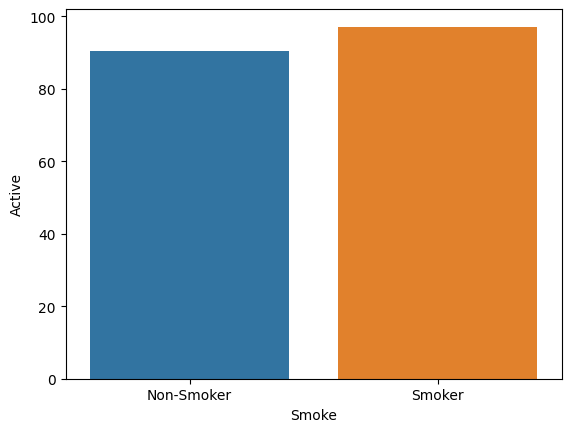

In [ ]:
sns.barplot(x = smoke_df["Smoke"], y = smoke_df["Active"])

<AxesSubplot: xlabel='Smoke', ylabel='Rest'>

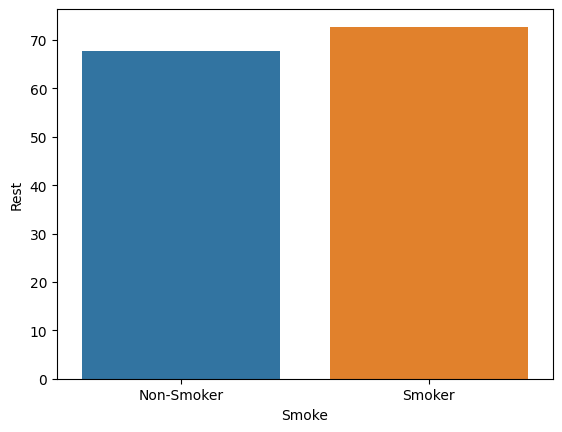

In [ ]:
sns.barplot(x = smoke_df["Smoke"], y = smoke_df["Rest"])

Non-Smokers have lesser active and rest heart rates than smokers.

In [ ]:
hdf3 = hdf.groupby("Exercise").mean()
hdf3

C:\Users\ragha\AppData\Local\Temp\ipykernel_28840\3375588930.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hdf3 = hdf.groupby("Exercise").mean()


,Unnamed: 0,Active,Rest,Hgt,Wgt
Exercise,,,,,
1.00000,108.300000,101.525000,77.400000,67.233184,147.353456
2.00000,126.153846,95.047396,70.432506,68.069334,157.266420
2.25974,39.000000,85.000000,68.358079,72.000000,158.138249
3.00000,109.450000,83.893130,62.853581,68.963094,163.245530


In [ ]:
exercise_df = pd.DataFrame(
    {
        "Exercise" : [1.00000, 2.00000,	2.25974,3.00000], 
        "Active" : [101.525000,95.047396	,85.000000	, 83.893130],
        "Rest" : [77.400000	, 70.432506	, 68.358079, 62.853581]

    }
)
exercise_df

,Exercise,Active,Rest
0,1.00000,101.525000,77.400000
1,2.00000,95.047396,70.432506
2,2.25974,85.000000,68.358079
3,3.00000,83.893130,62.853581


<AxesSubplot: xlabel='Exercise', ylabel='Active'>

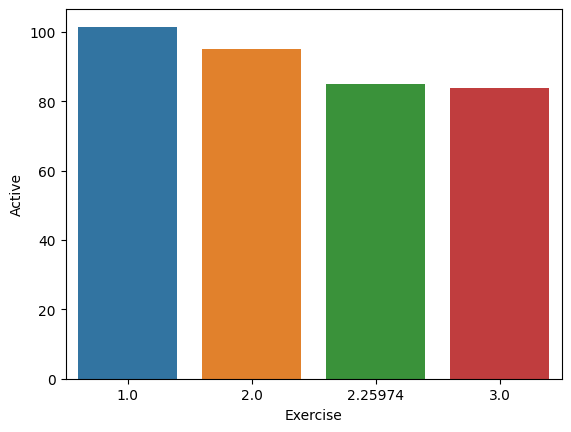

In [ ]:
sns.barplot(x = exercise_df["Exercise"], y = exercise_df["Active"])

<AxesSubplot: xlabel='Exercise', ylabel='Rest'>

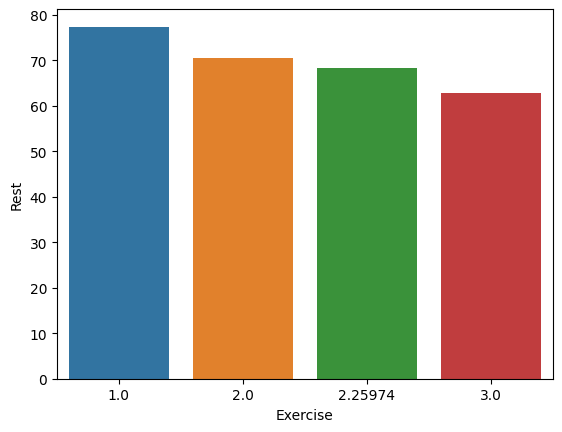

In [ ]:
sns.barplot(x = exercise_df["Exercise"], y = exercise_df["Rest"])

Greater the number of hours of exercise, lesser the active and rest heart rates.

Q8

Text(0, 0.5, 'Rest')

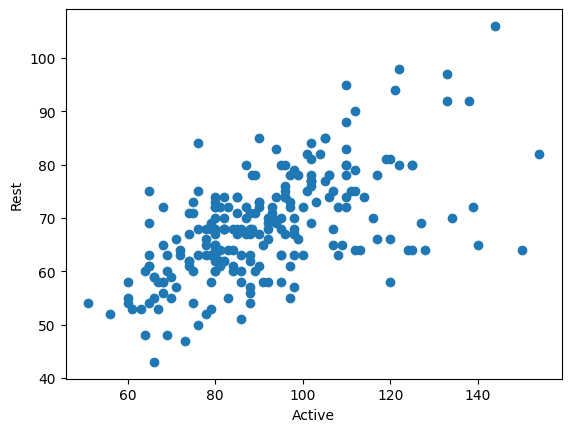

In [195]:
plt.scatter(hdf['Active'], hdf['Rest'])
plt.xlabel('Active')
plt.ylabel('Rest')

HeatMap

<AxesSubplot: >

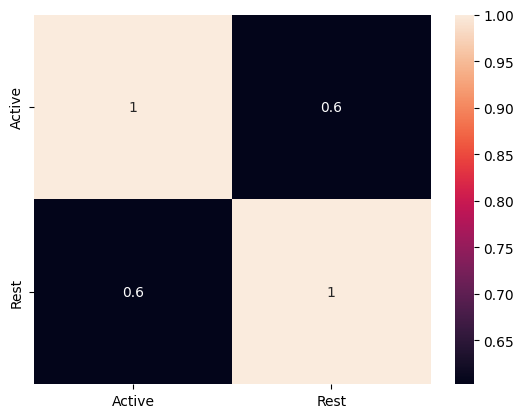

In [196]:
data = ['Active', 'Rest']
correlation = hdf[data].corr()
sns.heatmap(correlation, annot = True)

Best Fit Line

Text(0, 0.5, 'Rest')

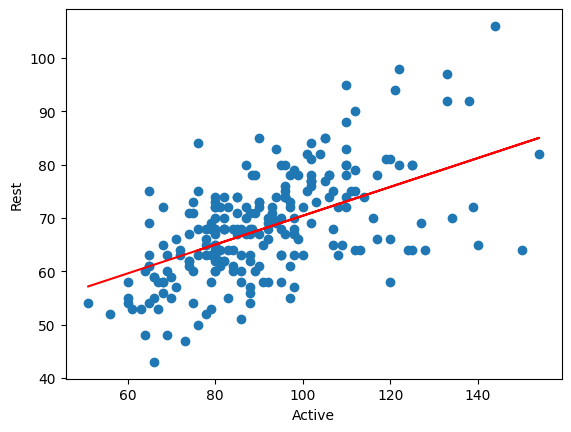

In [197]:
Active_ds = hdf.iloc[:,1:2]
Rest_ds = hdf.iloc[:,2:3]
x_train,x_test,y_train,y_test = train_test_split(Active_ds,Rest_ds,test_size = 0.2, random_state = 2)
model.fit(x_train,y_train)

plt.scatter(hdf['Active'], hdf['Rest'])
plt.plot(x_train,model.predict(x_train), color = 'red')
plt.xlabel('Active')
plt.ylabel('Rest')

In [198]:
prediction = model.predict(x_test)
prediction

array([[73.11292121],
       [70.13823843],
       [73.11292121],
       [65.81142713],
       [65.54100142],
       [66.89312996],
       [66.35227854],
       [65.00015001],
       [69.86781273],
       [65.00015001],
       [77.98058392],
       [69.05653561],
       [63.91844718],
       [68.7861099 ],
       [73.38334691],
       [69.59738702],
       [73.11292121],
       [77.1693068 ],
       [61.48461583],
       [66.08185284],
       [66.62270425],
       [72.03121838],
       [70.94951555],
       [65.00015001],
       [67.16355566],
       [65.54100142],
       [61.75504153],
       [65.00015001],
       [79.33271246],
       [74.19462403],
       [73.65377262],
       [64.4592986 ],
       [70.67908985],
       [62.56631865],
       [72.03121838],
       [64.4592986 ],
       [79.33271246],
       [61.21419012],
       [66.35227854],
       [69.59738702],
       [73.11292121],
       [69.59738702],
       [61.21419012],
       [75.00590115],
       [71.76079267],
       [67

In [199]:
residuals = np.subtract(y_test, prediction)
residuals

,Rest
20,-1.112921
151,-4.138238
30,6.887079
208,-10.811427
54,-3.541001
24,5.106870
207,0.647721
44,-5.000150
10,-12.867813
93,-2.000150


Residual Vs Fitted plot

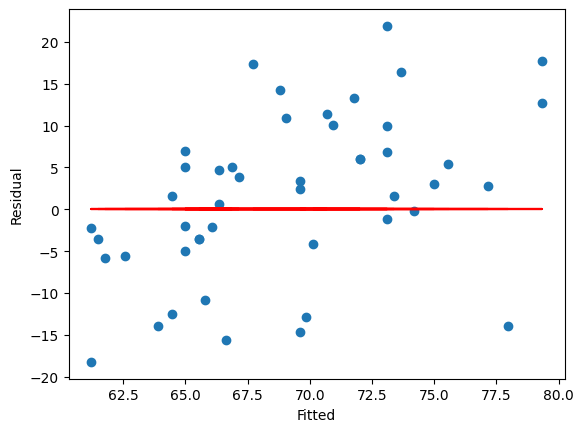

In [200]:
plt.scatter(prediction, residuals)
plt.xlabel('Fitted')
plt.ylabel('Residual')
zeros = np.full((len(prediction),1),0)
plt.plot(prediction,zeros, color = 'red')

Equation Of Best Fit Line

In [201]:
model.intercept_

array([43.36609349])

In [202]:
model.coef_

array([[0.27042571]])

X = Active, Y = Rest

In [203]:
print("Y = ",model.intercept_[0],"* x + ",model.coef_[0][0]) 

Y =  43.36609348844859 * x +  0.27042570652603604


Coefficient Of Determination

In [204]:
pearsons_coefficient = np.corrcoef(hdf['Active'], hdf['Rest'])
pearsons_coefficient

array([[1.       , 0.6026824],
       [0.6026824, 1.       ]])

In [205]:
coeff_det = pearsons_coefficient[0][1]*pearsons_coefficient[0][1]
coeff_det

0.36322607239029414

Q7


array([[<AxesSubplot: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Active', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Rest', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Gender', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Exercise', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Hgt', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='Wgt', ylabel='Unnamed: 0'>],
       [<AxesSubplot: xlabel='Unnamed: 0', ylabel='Active'>,
        <AxesSubplot: xlabel='Active', ylabel='Active'>,
        <AxesSubplot: xlabel='Rest', ylabel='Active'>,
        <AxesSubplot: xlabel='Gender', ylabel='Active'>,
        <AxesSubplot: xlabel='Exercise', ylabel='Active'>,
        <AxesSubplot: xlabel='Hgt', ylabel='Active'>,
        <AxesSubplot: xlabel='Wgt', ylabel='Active'>],
       [<AxesSubplot: xlabel='Unnamed: 0', ylabel='Rest'>,
        <AxesSubplot: xlabel='Active', ylabel='Rest'>,
        <AxesSubplot: xlabel='Rest', ylabel='Rest'>,
        <

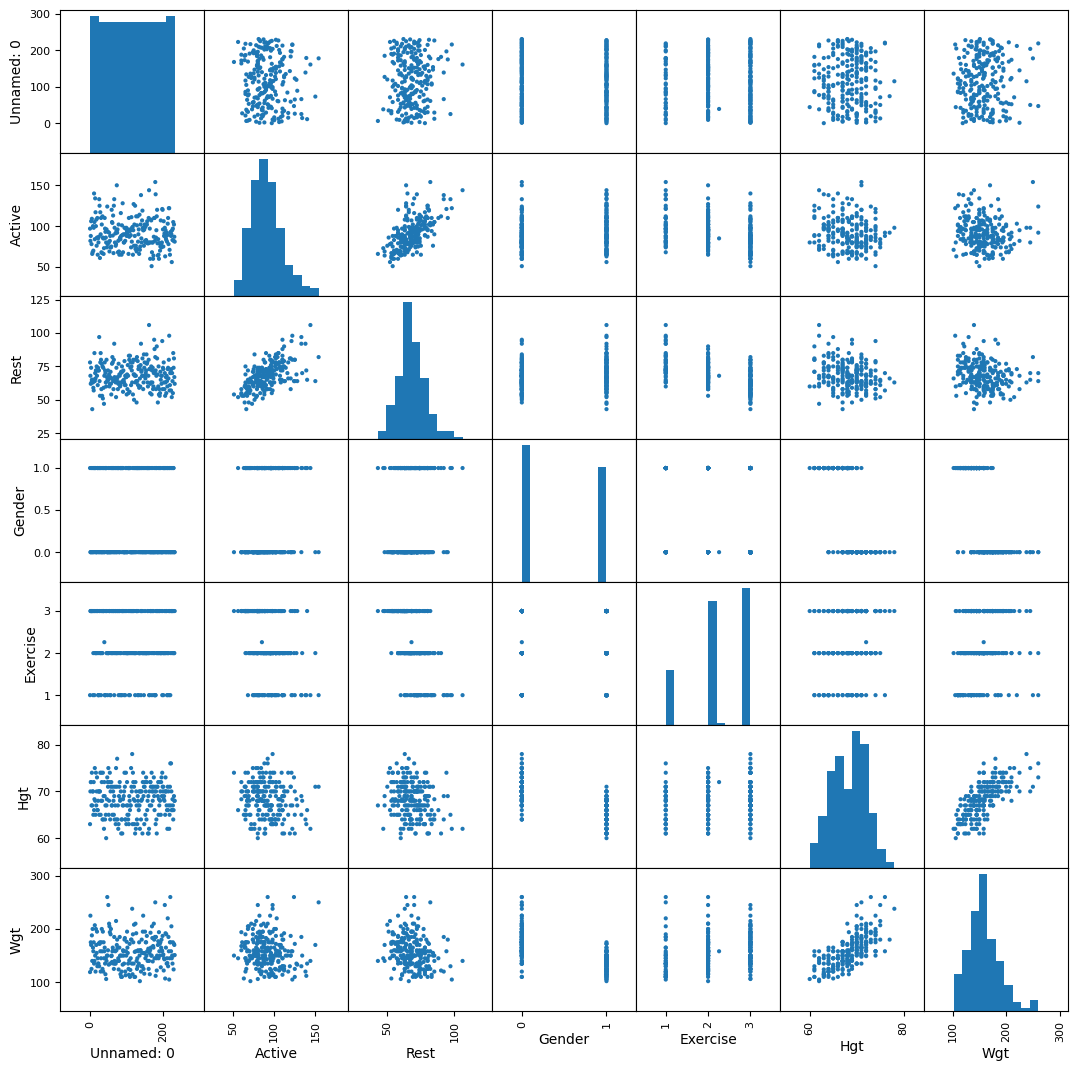

In [206]:
pd.plotting.scatter_matrix(hdf, alpha = None, diagonal='hist', figsize = (13,13), range_padding = 0.7)

We can see that active and rest, height and wight are correalated.

C:\Users\ragha\AppData\Local\Temp\ipykernel_28840\2676293843.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_all = hdf[corr_all_arr].corr()


<AxesSubplot: >

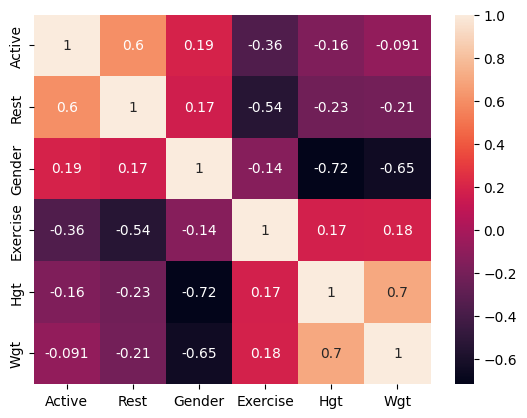

In [208]:
corr_all_arr = ["Active", "Rest", "Smoke", "Gender", "Exercise", "Hgt", "Wgt"] 
corr_all = hdf[corr_all_arr].corr()
sns.heatmap(corr_all, annot = True)